In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import math
import copy

import numpy as np
import gym
import gym_keygrid
import pandas as pd

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from utils import policy_display, states_display, qtable_display, plot_state_freq, plot_scores

### Environment and Optimal Value Function

In [3]:
env = gym.make('keygrid-v0', grid_length=15)

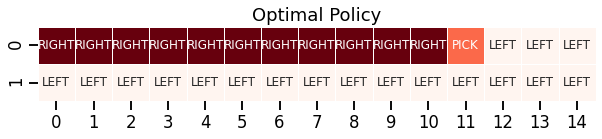

In [4]:
policy_display(env, env.opt_policy, title="Optimal Policy")

### TD Learning using optimal policy

In [5]:
from td_learning import td_learning

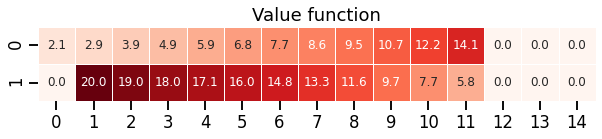

In [6]:
v_array = td_learning(env.opt_policy, env, display=False)

_ = states_display(v_array, title="Value function")

### Q Learning 

In [7]:
from td_learning import q_learning

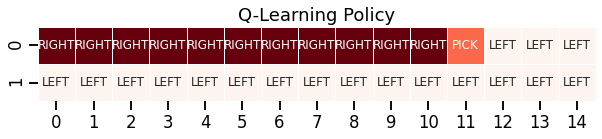

In [8]:
q_table = q_learning(env, display=False, num_episodes=50000)
q_policy = {x: env.actions[np.argmax(q_table[x])] for x in env.states}
_ = policy_display(env, q_policy, "Q-Learning Policy")

### Genetic Algorithm

In [9]:
from GA import train, get_best_agent

In [ ]:
best_agents = train(env)


****************************************************************************************************
TRAINING START

Generation: 1 Score: 0
Generation: 2 Score: 0
Generation: 3 Score: 0
Generation: 4 Score: 0
Generation: 5 Score: 0
Generation: 6 Score: 0
Generation: 7 Score: 0
Generation: 8 Score: 0
Generation: 9 Score: 0
Generation: 10 Score: 0
Generation: 11 Score: 0
Generation: 12 Score: 0
Generation: 13 Score: 0
Generation: 14 Score: 0
Generation: 15 Score: 0
Generation: 16 Score: 0
Generation: 17 Score: 0
Generation: 18 Score: 0
Generation: 19 Score: 0
Generation: 20 Score: 0
Generation: 21 Score: 0
Generation: 22 Score: 0
Generation: 23 Score: 0
Generation: 24 Score: 10
Generation: 25 Score: 10
Generation: 26 Score: 10
Generation: 27 Score: 10
Generation: 28 Score: 10
Generation: 29 Score: 10
Generation: 30 Score: 10
Generation: 31 Score: 10
Generation: 32 Score: 10
Generation: 33 Score: 10


In [ ]:
policy  = {x: get_best_agent(best_agents).get_action(x) for x in env.states}
policy_display(env, policy, "GA")

### ES Algorithm

In [ ]:
from ES import train

In [ ]:
agent = train(env)

In [ ]:
agent.get_policy()
agent.policy
policy_display(env, agent.policy, "ES")

### REINFORCE

In [ ]:
from reinforce import train

In [ ]:
agent = train(env, 500)

In [ ]:
plot_scores(agent.scores)

In [ ]:
agent.get_policy()
policy_display(env, agent.policy, "REINFORCE")

In [ ]:
plot_state_freq(agent.state_freq)

### Reinforce count state exploration

In [ ]:
from reinforce_count_states import train

In [ ]:
agent = train(env, 500)

In [ ]:
plot_scores(agent.scores)

In [ ]:
agent.get_policy()
policy_display(env, agent.policy, "REINFORCE State Count")

In [ ]:
plot_state_freq(agent.state_freq)

### Reinforce count seq exploration

In [ ]:
from reinforce_count_seq import train

In [ ]:
agent = train(env, 500)

In [ ]:
plot_scores(agent.scores)

In [ ]:
agent.get_policy()
policy_display(env, agent.policy, "REINFORCE Seq Count")

In [ ]:
plot_state_freq(agent.state_freq)

### NS ES

In [ ]:
# from NS_ES import train

In [ ]:
# agent = train(env)

### QD ES

In [ ]:
# npop = 40
# alpha = 0.1
# sigma = 1
# generation = 100

# K = 3
# archive = set()
# while len(archive) != K:
#     archive.add(QD_Agent().get_bc(env))

# agent = QD_Agent()


# print("\n"+"*"*100)
# print("TRAINING START\n")

# for gen in range(generation):
#     new_agents, N = create_pop(agent, npop=npop, sigma=sigma)
#     F = np.zeros(npop)
#     D = []
    
#     for i, n_a in enumerate(new_agents):
#         F[i] = n_a.evaluate(env)
#         D.append(n_a.get_bc(env)) 
    
# #     print(R)
    
#     nbrs = NearestNeighbors(n_neighbors=K, algorithm='ball_tree').fit(np.array(list(archive)))
#     D = np.mean(nbrs.kneighbors(np.array(R))[0], axis=1)

#     R = normalize_array(F) + normalize_array(D)
    
#     if np.std(R) == 0:
#         A = np.zeros(npop)
#     else:
#         A = (R - np.mean(R)) / np.std(R)
        
#     for key in agent.weights:
#         agent.weights[key] += alpha/(npop*sigma) * (N[key] @ A)
    
#     archive.add(agent.get_bc(env))
#     print(archive)
# #     print(agent.weights['w1'][0])
    
# #     print("Generation:", gen, "Score:", print(F))

# print("\n"+"*"*100)
# print("TRAINING ENDED\n")